In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

ModuleNotFoundError: No module named 'torchvision'

In [2]:
torch.manual_seed(20800)

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [4]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

In [5]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

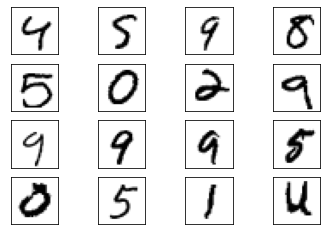

In [6]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

In [8]:
discriminator = Discriminator()

In [9]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator()

In [10]:
lr = 0.0001
num_epochs = 100
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [11]:
for n, (real_samples, mnist_labels) in enumerate(train_loader):
    # Data for training the discriminator
    real_samples = real_samples
    real_samples_labels = torch.ones((batch_size, 1))
    latent_space_samples = torch.randn((batch_size, 100))
    generated_samples = generator(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size, 1))
    all_samples = torch.cat((real_samples, generated_samples))
    all_samples_labels = torch.cat(
        (real_samples_labels, generated_samples_labels)
    )

    # Training the discriminator
    discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(
        output_discriminator, all_samples_labels
    )
    loss_discriminator.backward()
    optimizer_discriminator.step()

    # Data for training the generator
    latent_space_samples = torch.randn((batch_size, 100))

    # Training the generator
    generator.zero_grad()
    generated_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(
        output_discriminator_generated, real_samples_labels
    )
    loss_generator.backward()
    optimizer_generator.step()


In [12]:
latent_space_samples = torch.randn(batch_size, 100)
generated_samples = generator(latent_space_samples)

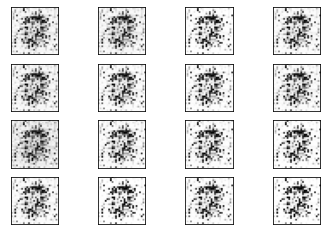

In [13]:
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [ ]:
D_loss = []
G_loss = []

for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 100))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        D_loss.append(loss_discriminator)
        G_loss.append(loss_generator)

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.07209421694278717
Epoch: 0 Loss G.: 7.106007099151611
Epoch: 1 Loss D.: 0.002198794623836875
Epoch: 1 Loss G.: 6.131710529327393
Epoch: 2 Loss D.: 0.010084547102451324
Epoch: 2 Loss G.: 5.199551582336426
Epoch: 3 Loss D.: 0.028628181666135788
Epoch: 3 Loss G.: 4.89898157119751
Epoch: 4 Loss D.: 0.140883669257164
Epoch: 4 Loss G.: 3.877197504043579
Epoch: 5 Loss D.: 0.2356961965560913
Epoch: 5 Loss G.: 2.231590509414673
Epoch: 6 Loss D.: 0.13089139759540558
Epoch: 6 Loss G.: 4.026623725891113
Epoch: 7 Loss D.: 0.11724649369716644
Epoch: 7 Loss G.: 3.536360740661621
Epoch: 8 Loss D.: 0.229423388838768
Epoch: 8 Loss G.: 1.8181331157684326
Epoch: 9 Loss D.: 0.26572948694229126
Epoch: 9 Loss G.: 1.754684329032898
Epoch: 10 Loss D.: 0.3118972182273865
Epoch: 10 Loss G.: 1.6499396562576294
Epoch: 11 Loss D.: 0.5014885663986206
Epoch: 11 Loss G.: 1.7349287271499634
Epoch: 12 Loss D.: 0.39714014530181885
Epoch: 12 Loss G.: 1.395772933959961
Epoch: 13 Loss D.: 0.6676369309425

In [ ]:
latent_space_samples = torch.randn(batch_size, 100)
generated_samples = generator(latent_space_samples)

In [ ]:
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [17]:
D_l = [D_loss[i].detach().numpy() for i in range(len(D_loss))]
G_l = [G_loss[i].detach().numpy() for i in range(len(G_loss))]

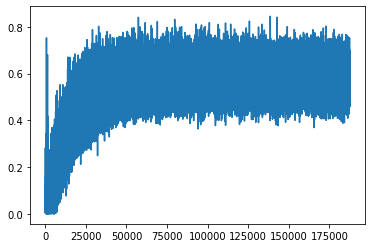

In [18]:
plt.plot(D_l)

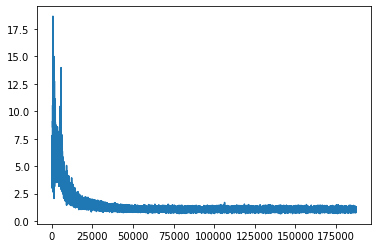

In [19]:
plt.plot(G_l)